In [256]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2


In [29]:
#Fetch Image count from Fodlers


In [257]:
 #Load Image into Arrays as datset
base_dir ='Images1/'
 img_size =180
 batch =32 

In [258]:
# Fetch Image count from Folders
count = 0
dirs = os.listdir('Images1/')
for dir in dirs:
    dir_path = os.path.join('Images1', dir)
    
    # Ensure the current item is a directory
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        print(dir + ' Folder has ' + str(len(files)) + ' images')
        count += len(files)

print('Images1 folder has ' + str(count) + ' images in total')


.ipynb_checkpoints Folder has 1 images
Anchor Switch Folder has 1 images
CCTV CAMERA Folder has 30 images
FAN Folder has 20 images
Switch Folder has 1 images
tv Folder has 44 images
Images1 folder has 97 images in total


In [259]:
img_size = 224
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset='training',
                                                      batch_size=batch,
                                                      image_size=(img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed=123,
                                                      validation_split=0.2,
                                                      subset='validation',
                                                      batch_size=batch,
                                                      image_size=(img_size, img_size))                                                      


Found 100 files belonging to 5 classes.
Using 80 files for training.
Found 100 files belonging to 5 classes.
Using 20 files for validation.


In [260]:

product_names = train_ds.class_names
print(product_names)


['Anchor Switch', 'CCTV CAMERA', 'FAN', 'Switch', 'tv']


In [261]:
import matplotlib.pyplot as plt

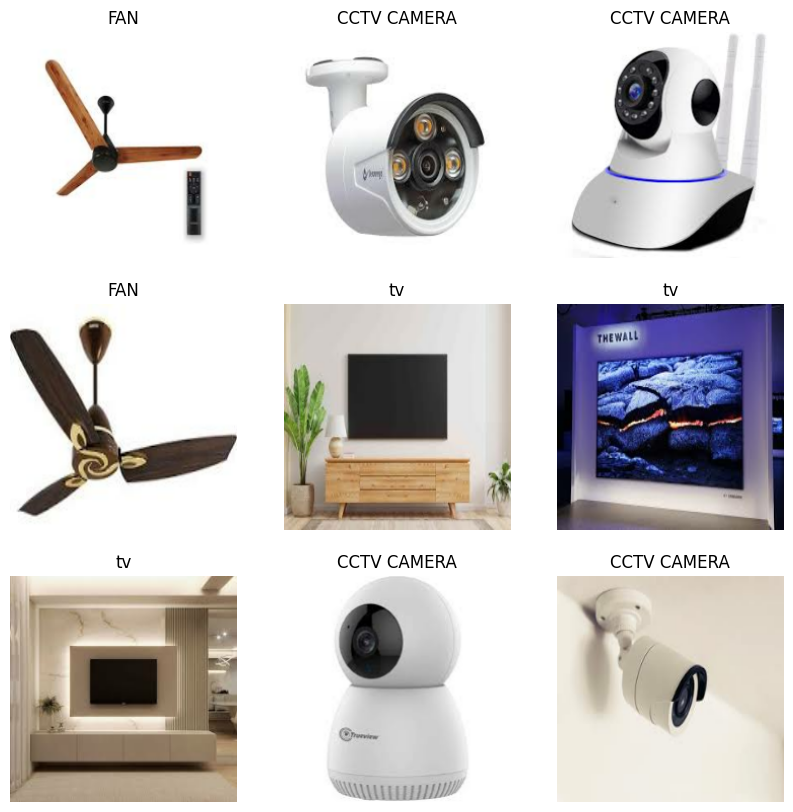

In [262]:
i = 0
plt.figure(figsize=(10, 10))

for images1, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images1[i].numpy().astype('uint8'))
        plt.title(product_names[labels[i]])
        plt.axis('off')
plt.show()


In [263]:
AUTOTUNE = tf.data.AUTOTUNE

In [264]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [266]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [15]:
#data augmentaion

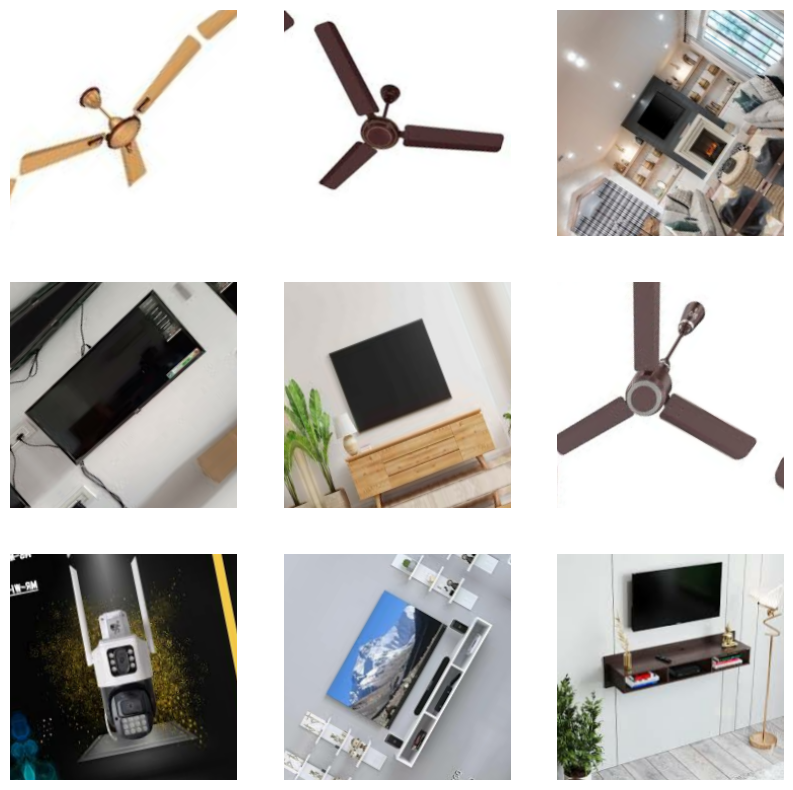

In [267]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming data_augmentation is already defined elsewhere
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

# Plot augmented images
plt.figure(figsize=(10, 10))

for images1, labels in train_ds.take(1):
    for i in range(9):
        image = images1[i]

        # Resize the image to (224, 224) if necessary
        resized_image = tf.image.resize(image, [224, 224])  # Resize if images are not 224x224
        
        # Expand dimensions to fit the input format required by data augmentation
        image_batch = tf.expand_dims(resized_image, axis=0)  # Shape becomes (1, 224, 224, 3)
        
        # Apply data augmentation
        augmented_image_batch = data_augmentation(image_batch)
        
        # Squeeze the batch dimension for visualization
        augmented_image = tf.squeeze(augmented_image_batch, axis=0)  # Shape becomes (224, 224, 3)

        # Plot the image
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image.numpy().astype('uint8'))
        plt.axis('off')

plt.show()


In [268]:
#model Creation

In [269]:

img_size = 224

# Model Creation using Transfer Learning (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False  # Freeze base model

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(flower_names))
])





In [270]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [271]:
model.summary()


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_47 (Sequential)           │ (1, 224, 224, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (1, 224, 224, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (1, 7, 7, 1280)             │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_17          │ (1, 1280)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (1, 128)                    │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (1, 6)                      │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [272]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2555 - loss: 1.8142 - val_accuracy: 0.8500 - val_loss: 0.5962
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - accuracy: 0.9359 - loss: 0.3447 - val_accuracy: 0.9000 - val_loss: 0.3284
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.9820 - loss: 0.0940 - val_accuracy: 0.9000 - val_loss: 0.1996
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step - accuracy: 1.0000 - loss: 0.0323 - val_accuracy: 0.9500 - val_loss: 0.1106
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.9820 - loss: 0.0353 - val_accuracy: 0.9500 - val_loss: 0.0870
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0687
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 0.0572
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0

In [273]:
def classify_images1(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))  # Update to 224
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    predicted_class = flower_names[np.argmax(result)]
    
    # Define product links
    product_links = {
        'Anchor Switch': 'https://www.flipkart.com/anchor-switches',
        'CCTV CAMERA': 'https://www.flipkart.com/cctv-cameras',
        'FAN': 'https://www.flipkart.com/fans',
        'Switch': 'https://www.flipkart.com/switches',
        'tv': 'https://www.flipkart.com/tvs'
    }

    # Generate the dynamic link
    buy_link = product_links.get(predicted_class, 'https://www.flipkart.com/')
    outcome = f'The image belongs to {predicted_class}. Buy here: {buy_link}'
    return outcome


In [275]:
classify_images1('Downloads/WhatsApp Image 2024-09-12 at 2.21.33 PM.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'The image belongs to FAN. Buy here: https://www.flipkart.com/fans'

In [276]:
model.save('Vipul_Recog_Model.keras')